<a href="https://colab.research.google.com/github/Clinda02/customer_analysis/blob/main/7_inventory_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7. 재고 회전률 분석(판매 속도)

* **판매 속도 = 판매된 총 수량 / 재고 수량**
* 제품의 판매가 재고 수준에 비해 얼마나 빠르게 이루어지고 있는지를 대략적으로 파악
* 재고 수량 대비 판매된 수량의 비율이 높으면, 그 제품의 수요가 높고 재고 회전이 빠르다고 볼 수 있음. <br>
반대로 이 비율이 낮으면 재고가 더디게 소진되고 있음을 의미
* 제품별로 판매된 총 수량(totalSold)과 재고 수량(quantityInStock)을 기반으로 판매 속도(salesRate)를 계산하고, 이를 시각화합니다.
* 판매 기록이 없는 제품의 경우 totalSold를 0으로 처리하여 모든 제품을 포함시킵니다. 또한, HAVING 절을 사용하여 재고 수량이 0보다 큰 제품만을 대상으로 합니다.




#### 회사 전략
* **재고 관리 전략 조정**: 판매 속도가 높은 제품에 대한 재고 관리 전략을 조정하여, 재고 부족으로 인한 매출 손실을 방지. 적절한 재고 수준을 유지하면서도, 과잉 재고가 발생하지 않도록 계획을 세워야 함.

* **수요 예측 모델 개선**: 판매 속도 분석 결과를 활용하여 수요 예측 모델을 개선할 수 있음. 이를 통해 미래의 판매 추세를 더 정확히 예측하고, 제품별로 최적의 재고 수준을 결정할 수 있음.

* **마케팅 및 판매 전략 조정**: 판매 속도가 높은 제품을 중심으로 마케팅 및 판매 전략을 조정. 예를 들어, 이러한 제품에 대한 프로모션 활동을 강화하거나, 판매 채널을 확장하여 수요를 더욱 증대시킬 수 있음.

* **공급망 관리 최적화**: 공급망 관리 프로세스를 최적화하여, 판매 속도가 높은 제품의 재고를 신속하게 보충할 수 있도록 함. 공급업체와의 협력을 강화하고, 주문 및 배송 프로세스를 개선하여 공급망의 효율성을 높일 수 있음.


In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
  host = 'localhost',
  user = 'root',
  password = 'password',
  database = 'classicmodels'
)
cursor = conn.cursor

# 재고 최적화 분석 SQL 쿼리 실행
query ="""
SELECT p.productCode,
		p.productName,
    	p.quantityInStock,
    	IFNULL(SUM(od.quantityOrdered), 0) as totalSold,
   	IFNULL(SUM(od.quantityOrdered), 0) / p.quantityInStock as salesRate
FROM products p
LEFT JOIN orderdetails od ON od.productCode = p.productCode
GROUP BY p.productCode
HAVING p.quantityInStock > 0
ORDER BY salesRate DESC
LIMIT 20
;
"""

# 데이터프레임 생성
df = pd.read_sql_query(query, conn)
df

C:\Users\user\AppData\Local\Temp\ipykernel_11388\2118922918.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,productCode,productName,quantityInStock,totalSold,salesRate
0,S24_2000,1960 BSA Gold Star DBD34,15,1015.0,67.6667
1,S12_1099,1968 Ford Mustang,68,933.0,13.7206
2,S32_4289,1928 Ford Phaeton Deluxe,136,972.0,7.1471
3,S32_1374,1997 BMW F650 ST,178,1014.0,5.6966
4,S72_3212,Pont Yacht,414,958.0,2.3140
5,S700_3167,F/A 18 Hornet 1/72,551,1047.0,1.9002
6,S50_4713,2002 Yamaha YZR M1,600,992.0,1.6533
7,S18_2795,1928 Mercedes-Benz SSK,548,880.0,1.6058
8,S18_2248,1911 Ford Town Car,540,832.0,1.5407
9,S700_1938,The Mayflower,737,898.0,1.2185


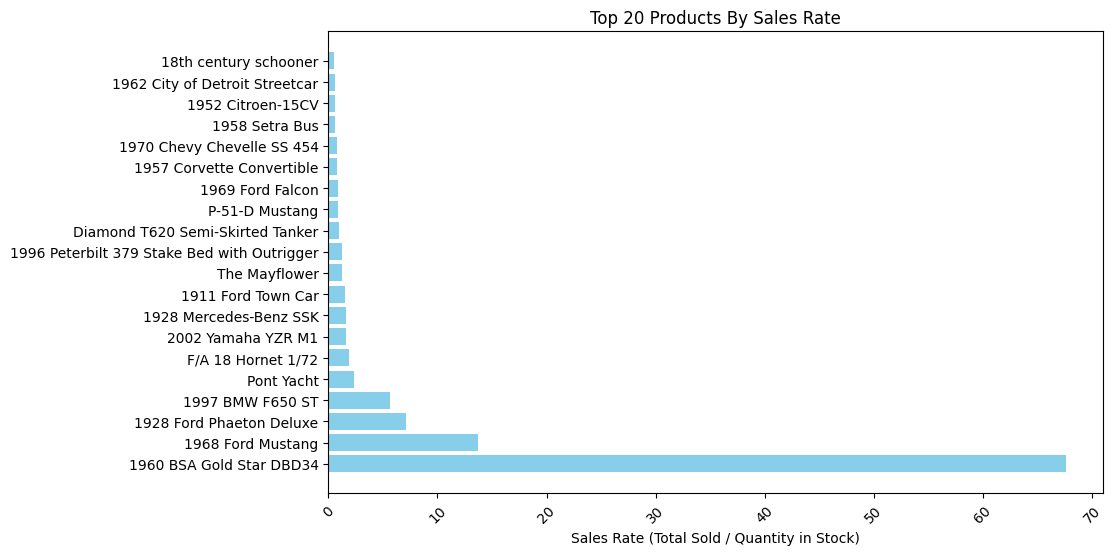

In [ ]:
# 재고 분석 시각화 (barh)
plt.figure(figsize=(10,6))
plt.barh(df['productName'], df['salesRate'], color = 'skyblue')
plt.xlabel('Sales Rate (Total Sold / Quantity in Stock)')
plt.title('Top 20 Products By Sales Rate')
plt.xticks(rotation=45)
plt.show()

### 인사이트 도출
* **1960 BSA Gold Star DBD34** 제품의 재고 회전률이 압도적인 메인상품으로, 집중 관리가 필요.